In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [33]:
df=pd.read_csv("test.csv")
df.shape

(2947, 563)

In [34]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [35]:
y=df.iloc[:, -1] 
print(y)

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 2947, dtype: object


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols=df.select_dtypes(include="number").columns
X_scaled = scaler.fit_transform(df[numerical_cols])
X_scaled


array([[-0.2777081 , -0.21063123,  2.19307573, ...,  0.62272321,
        -0.0383485 , -1.58082533],
       [ 0.19865964,  0.18259066, -0.25026383, ...,  0.63673075,
        -0.14570918, -1.58082533],
       [ 0.02458676, -0.31805537, -0.22848456, ...,  0.63284514,
        -0.12685534, -1.58082533],
       ...,
       [ 1.25445818,  1.86244113, -0.17318039, ...,  0.61556116,
         0.95227139,  1.58473137],
       [-0.60108793,  1.41138509,  0.27812868, ...,  0.58565426,
         0.97869501,  1.58473137],
       [-1.98758645, -0.02226443, -0.66991444, ...,  0.58304691,
         0.98093374,  1.58473137]], shape=(2947, 562))

In [37]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


In [38]:
pca_df = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
pca_df['Activity'] = y


In [39]:
print("Explained Variance Ratio (per component):\n", pca.explained_variance_ratio_)
print("\nCumulative Variance:\n", np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio (per component):
 [5.12928799e-01 5.40762601e-02 2.61400661e-02 2.30484728e-02
 1.92879008e-02 1.86408767e-02 1.41384172e-02 1.17582793e-02
 1.04633078e-02 9.48836624e-03 9.08696239e-03 8.18386584e-03
 7.61440700e-03 7.17023915e-03 7.11914717e-03 6.60035431e-03
 6.24765543e-03 6.16446883e-03 5.90653277e-03 5.76080233e-03
 5.48096370e-03 5.37650372e-03 5.06826026e-03 4.87458265e-03
 4.75615103e-03 4.55038853e-03 4.47996292e-03 4.28339620e-03
 4.15228307e-03 4.05615654e-03 3.86867280e-03 3.75808760e-03
 3.64856578e-03 3.58951794e-03 3.44352500e-03 3.29480979e-03
 3.19880884e-03 3.16832982e-03 3.13474119e-03 3.03583346e-03
 2.99790535e-03 2.82019718e-03 2.75921885e-03 2.68598868e-03
 2.65252108e-03 2.59126842e-03 2.50404134e-03 2.44302951e-03
 2.37449200e-03 2.33913093e-03 2.27674939e-03 2.22359715e-03
 2.16970723e-03 2.14922290e-03 2.09662474e-03 2.04520980e-03
 2.00950619e-03 1.99681501e-03 1.94633486e-03 1.92863749e-03
 1.85913936e-03 1.80881035e-03 1.77356209e

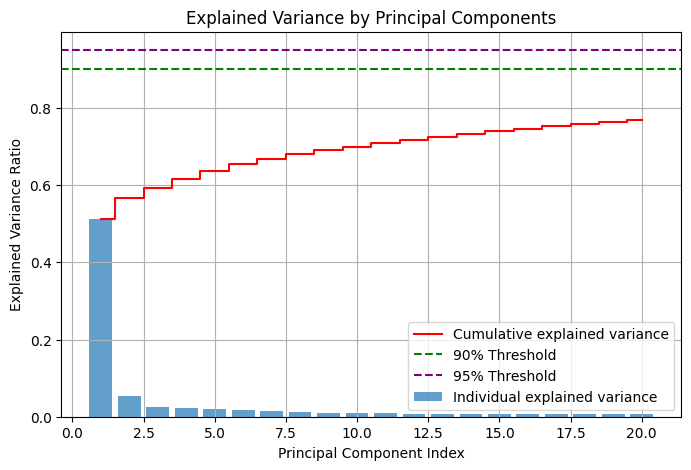

In [40]:
explained_var = pca.explained_variance_ratio_[:20] 

plt.figure(figsize=(8, 5))
plt.bar(range(1, 21), explained_var, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, 21), np.cumsum(explained_var), where='mid', label='Cumulative explained variance', color='red')
plt.axhline(y=0.90, color='green', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='purple', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
components_90 = np.argmax(cumulative_var >= 0.90) + 1
components_95 = np.argmax(cumulative_var >= 0.95) + 1

print("Components needed for 90% variance:", components_90)
print("Components needed for 95% variance:", components_95)


Components needed for 90% variance: 62
Components needed for 95% variance: 99


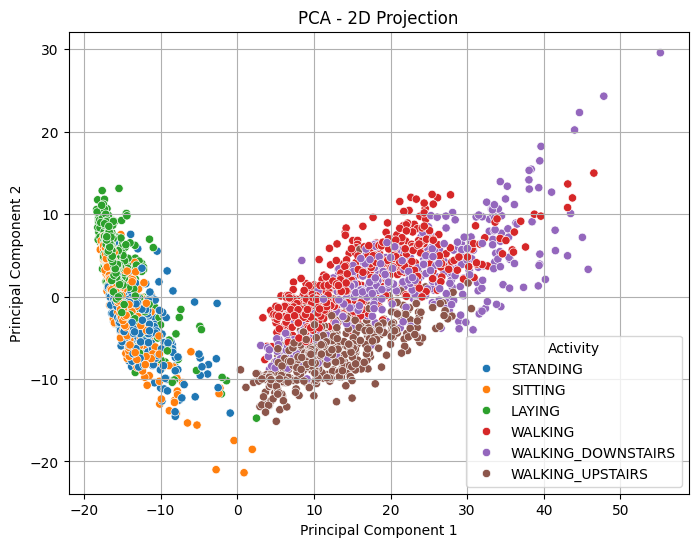

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Activity', palette='tab10')
plt.title("PCA - 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
activity_encoded = le.fit_transform(pca_df['Activity'])


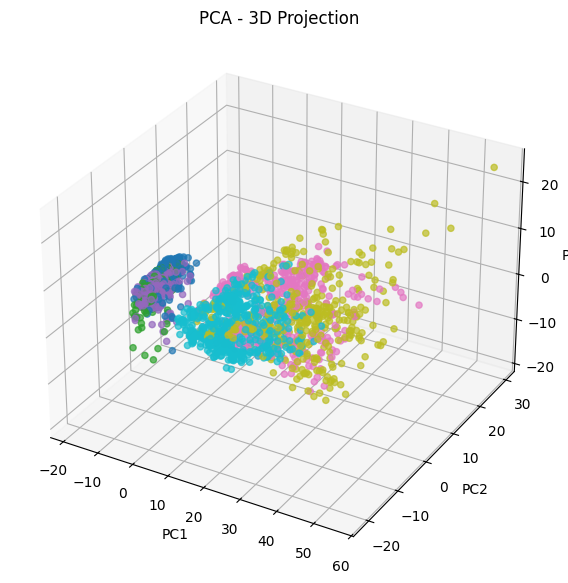

In [44]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=activity_encoded, cmap='tab10', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("PCA - 3D Projection")
plt.show()
